<a href="https://colab.research.google.com/github/tpgus2603/2024S-Ajou-ML/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제1. Linear SVM vs Kernel SVM

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


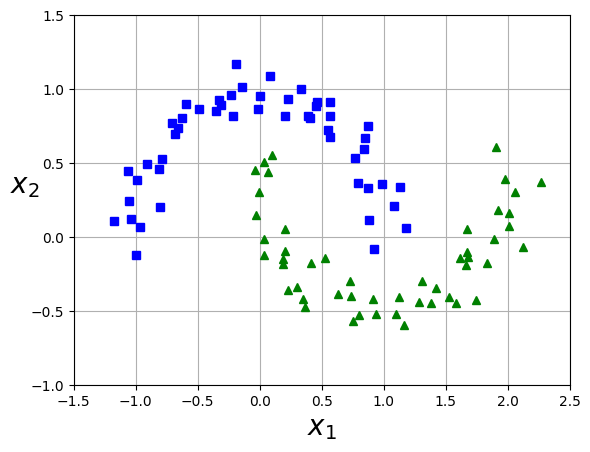

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

#Toy example 생성
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [3]:
# decision boundary 시각화
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

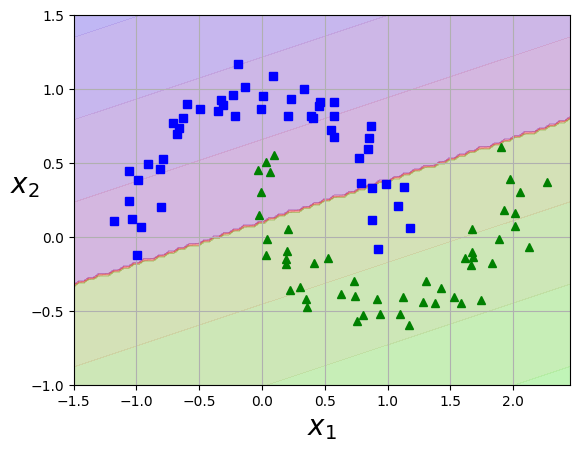

In [4]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(C=1)
linear_svc.fit(X,y)
plot_predictions(linear_svc, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])

## 문제 1-1 Kernel SVM 학습

Kernel SVM을 아래의 조건에 맞게 학습하고 시각화를 진행하시오.

\

---
*조건*

 1. `rbf` Kernel을 사용하여 주어진 X를 `100% 정확도`로 예측하는 하이퍼파라미터를 찾으시오.
 2. `Linear SVM`과 `Kernel SVM`의 decision boundary를 시각화하시오.
 3. subplot을 활용하여 기존 `Linear SVM`와 비교할 수 있도록 시각화하시오.
 ---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요! (해당 문제의 param_gird는 예외입니다.)
* 주의) 소스코드를 입력하고 출력 결과와 함께 캡처 후**(한 이미지에)** 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

1.0


Text(0.5, 1.0, 'Kernel')

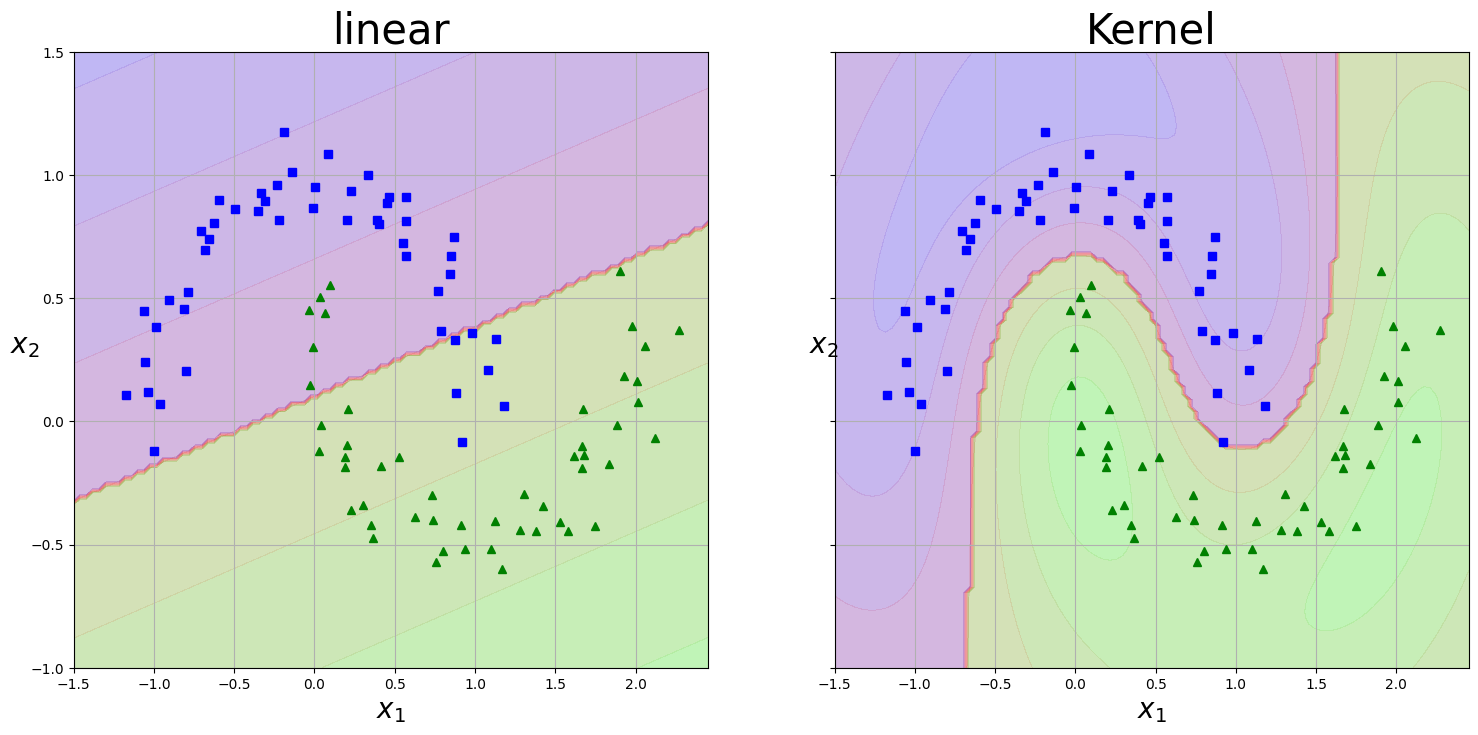

In [25]:
from sklearn.svm import SVC

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8), sharex=True, sharey=True)

plt.sca(axes[0])
plot_predictions(linear_svc, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
plt.title("linear", fontsize=30)

#####################문제1-1###############################
from sklearn.metrics import accuracy_score
clf = SVC(kernel='rbf', C=3, gamma=1)  #정확도 100을 만드는 c값 1 감마값 1로 kernel svm만듬
clf.fit(X, y) # 학습
predictions = clf.predict(X) #x에 대해 예측하기

accuracy = accuracy_score(y, predictions) # y와 비교해서 정확도 측정
print(accuracy)

plt.sca(axes[1])   #subplot으로 시각화
plot_predictions(clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
plt.title("Kernel", fontsize=30)


##########################

# 문제 1-2 Kernel SVM의 장점

* **해당 데이터에서 Linear SVM보다 Kernel SVM이 잘 동작할 수 있는 이유를 서술하시오.**
* **데이터의 분포와 모델의 특징을 연결지어서 설명하시오.**


정답 : 해당 데이터 셋의 분포를 보면 2차원에서 linear decision bpundary로는 완벽하게 classification이 되지 않는다. linear svm은 linear하게 구분되는 데이터셋에서만 확실하게 classification이 될 수 있다.
따라서 해당 데이터셋에서는 고차원으로 매핑하여 linear한 boundary를 찾고 다시 차원을 낮춰 non-linear decision boundary를 찾는 방법을 사용해야하는데.  kerenl svm이 이처럼 linear하게 구분되지 않는 데이터셋에서 kernel trick을 활용하여 오버헤드를 줄이고 non -linear한 deision boundary를 찾을 수 있다.

## 데이터 코드

# 문제 2. Validation

- `Test set` **<font color=red> 은 문제 2-3에서만 사용해야 합니다. </font>**

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split

# dir을 바꿔주세요.
# digits_clean 데이터를 사용해야 합니다.

data = pd.read_csv('./drive/MyDrive/24-1/digits_clean.csv').to_numpy()
labels = pd.read_csv('./drive/MyDrive/24-1/digits_target.csv').to_numpy().reshape(-1)
train_X, test_X, train_y, test_y = train_test_split(data, labels, test_size= 0.2, random_state = 12)

## 문제 2-1

 - 아래 코드의 방식으로 평가 시 발생하는 문제를 서술하시오.
 - `Model fitting` 관점에서 서술
 - Validation set의 목적

In [54]:
from sklearn.svm import SVC

rbf_kernel_svm_clf = SVC(kernel="rbf", gamma=100, C=100)
rbf_kernel_svm_clf.fit(train_X, train_y)
X_val, y_val = train_X, train_y
print(f"Validation score : {rbf_kernel_svm_clf.score(X_val, y_val)}")

Validation score : 1.0


정답: rbf kernel svm에서 c값은 오류항에 대한 패널티 매개변수이고  감마값은 단일 훈련 데이터 포인터들이 도달하는 영향을 말하는데 이 값이 클수록 커널 효과가 서포트 벡터 주변 작은 영역으로 제한된다

근데 해당 코드를 보면 c를 100으로 설정하였다 c가 클수록 잘못 분류된 포인트에 높을 패널티를 부여하게 되는데 default값이 1인데 100정도로 큰 패널티를 부여하면 모델이 테스트 데이터에만 적합해지는 overfitting가 발생한다.
또한 감마값 역시 100이 굉장히 큰 수치인데 decision boundary가 가까이에 있는 데이터 샘플들에 영향을 크게 받아 decision bounday가 크게 구불구불해지고 이런 경우 역시 overfitting의 가능성이 커진다.

게다가 validation score를 위한 데이터 셋을 훈련 세트 그대로 사용했는데.
validation set을 훈련 세트 그대로 사용하게된다면 평가가 적절하게 이루어지지 않는다. validation set은 평가를 위한 훈련세트와 별개로 겹치지 않게 사용되어야 하는데
훈련세트 그대로 사용하면 적절하게 평가가 이루어지지 않는다. 이 경우 overfitting이 발생한 classfier에 대해서 학습에 사용한 데이터를 그대로 사용하여 overfittiong를 검출하지 못하고 1.0의 validation socre를 출력하는 문제가 발생했다.




##문제 2-2 K-fold Cross validation

5-fold Cross Validation (CV) 을 사용하여 모델을 평가하시오.

\

---
*조건*
1. **<font color=red>* cross_val_score 함수를 사용하지 마세요. </font>**
2. Cross validation score의 분산과 평균을 출력하시오.
3. Cross validation score(Accuracy)가 0.8 이상인 Hyperparameter를 찾고 전체 train set으로 학습하시오.
4. `Test set`에 대해서 `문제 2-1`에서 학습한 모델과 최종 성능에 대해서 비교하시오 (출력만 하시면 됩니다).

---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요! (해당 문제의 param_gird는 예외입니다.)
* 주의) 소스코드를 입력하고 출력 결과와 함께 캡처 후**(한 이미지에)** 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.


In [67]:
from sklearn.model_selection import KFold

#####################문제2-2###############################
#감마값과 c값 정해줌 분산이 작고 정확도가 높게끔 적절히 수치 조정
gamma =0.005
C =10

kernel_svm_clf =SVC(kernel='rbf',C=C,gamma=0.005)
kf=KFold(n_splits=5,shuffle=True,random_state=42)
accuracies = [] #정확도를 저장할 리스트
for train_index, test_index in kf.split(train_X):
    # 데이터 분할
    X_train, X_test = train_X[train_index], train_X[test_index]
    y_train, y_test = train_y[train_index], train_y[test_index]

    # 학습
    kernel_svm_clf.fit(X_train, y_train)

    # 예측
    predictions = kernel_svm_clf.predict(X_test)

    # 정확도 계산
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

# 5개의 정확도에 대한 평균 분산 구하기
mean_accuracy = np.mean(accuracies)
variance_accuracy = np.var(accuracies)

#평균 출력
print(f"평군 : {mean_accuracy}")

#분산 출력
print(f"분산 : {variance_accuracy}")

final_svm =SVC(kernel='rbf',C=C,gamma=gamma)
final_svm.fit(train_X,train_y)

#########################################################

print(f"final_model 정확도 : {final_svm.score(test_X,test_y)}")
print(f"2-1 model 정확도 : {rbf_kernel_svm_clf.score(test_X,test_y)}")

평군 : 0.9147826086956521
분산 : 0.0001482041587901705
final_model 정확도 : 0.9375
2-1 model 정확도 : 0.1076388888888889


# 문제 2-3 Stratified K-fold Cross validation

위에서 찾은 하이퍼파라미터로 Stratified K-fold Cross validation을 진행하면서 각 fold의 test y(class)의 분포를 histplot(혹은 barplot) 시각화하세요.

\

---
*조건*

1. **<font color=red>* cross_val_score 함수를 사용하지 마세요. </font>**
2. fold 별 y 분포 그래프의 경우, 주어진 subplot을 활용하세요.
3. (Stratified) Cross validation score의 분산과 평균을 출력하시오.

---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요! (해당 문제의 param_gird는 예외입니다.)
* 주의) 소스코드를 입력하고 출력 결과와 함께 캡처 후**(한 이미지에)** 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

In [68]:
from sklearn.model_selection import StratifiedKFold
import seaborn as sns

평군 : 0.9869565217391305
분산 : 7.561436672967969e-06


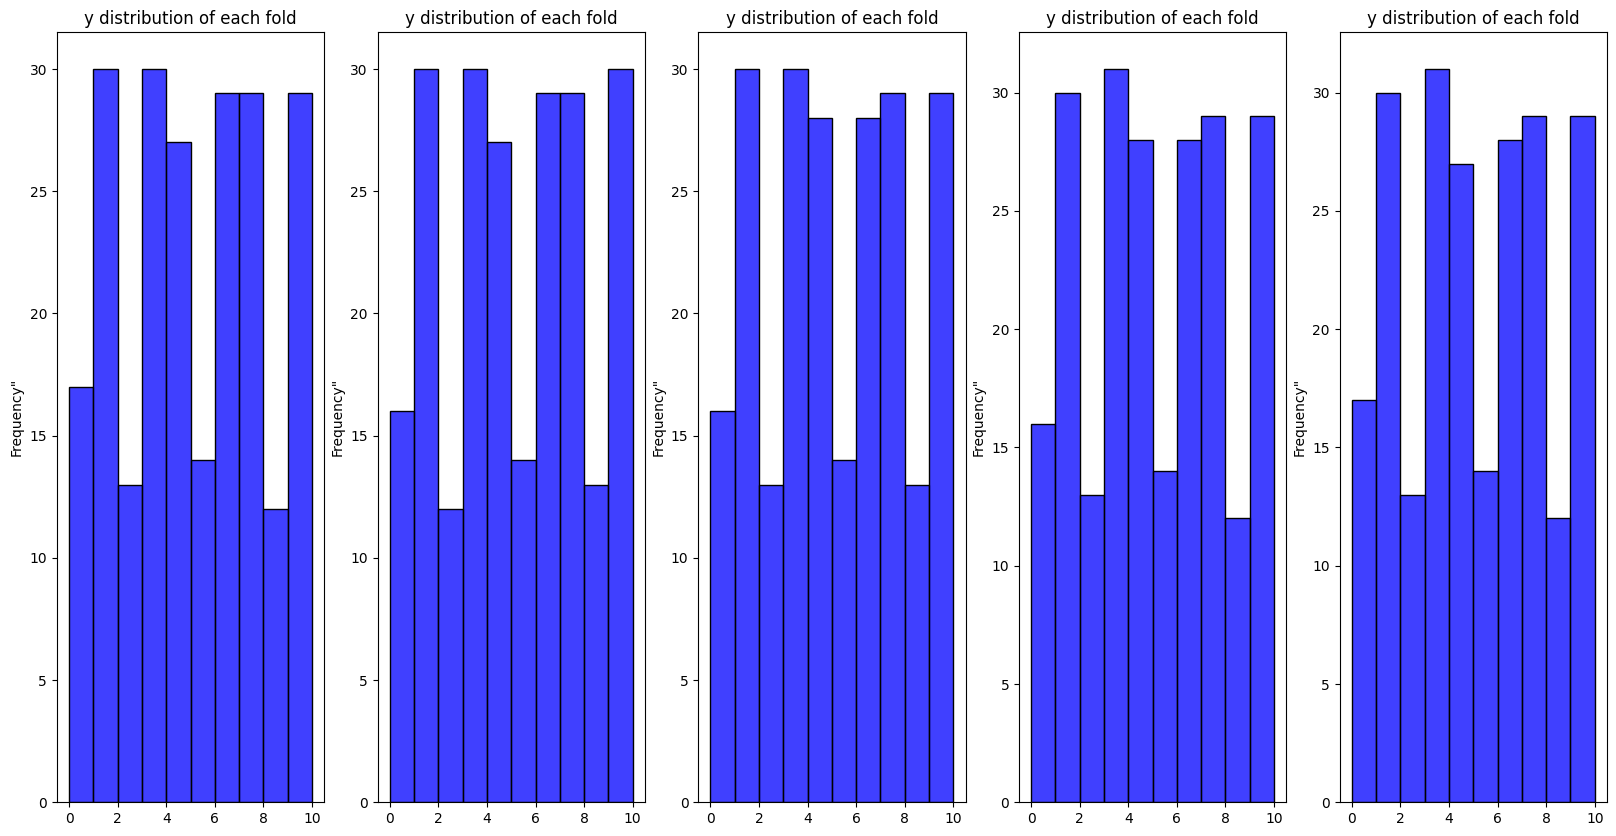

In [83]:


#####################문제2-3###############################
gamma =0.005
C =10
valid_svm = SVC(kernel='rbf', C=C, gamma=gamma) #svm모델 생성
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #startifiedkfold사용
fold_no = 0
accuracies = [] #정확도 리스트
for train_index, test_index in skf.split(train_X, train_y):
    X_train, X_test = train_X[train_index], train_X[test_index]
    y_train, y_test = train_y[train_index], train_y[test_index]

    #훈련
    valid_svm.fit(X_train, y_train)

    # 예측
    predictions = kernel_svm_clf.predict(X_test)

    # 정확도 계산
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

    # 서브플럿 생성
    sns.histplot(y_test, bins=np.arange(y_test.min(), y_test.max()+2), kde=False, ax=axes[fold_no], color='blue', edgecolor='black')
    axes[fold_no].set_title("y distribution of each fold")
    axes[fold_no].set_ylabel('Frequency"')
    fold_no += 1
#5개의 fold에대한 평균,분산구하기
mean_accuracy2 = np.mean(accuracies)
variance_accuracy2 = np.var(accuracies)

#평균 출력
print(f"평군 : {mean_accuracy2}")

#분산 출력
print(f"분산 : {variance_accuracy2}")

########################################################

# 문제 3. Grid search

- Scikit-learn 라이브러리를 이용하여 RandomForestClassifier의 최적의 파라미터를 찾는다.

- 아래 baseline 모델보다 높은 성능을 보이는 RandomForestClassifier 모델을 구축한다.

In [85]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# dir 바꾸시기 바랍니다.
df = pd.read_csv('/content/drive/MyDrive/24-1/Bank_clean.csv')


# 코드 건드리지 말 것
for i in df.columns: # label encoding
    if type(df[i].unique()[0]) == str :
      le = LabelEncoder()
      df[i] = le.fit_transform(df[i])

y = df['y']
X = df.drop(columns = 'y')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split dataset

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 코드 건드리지 말 것
clf = RandomForestClassifier(n_estimators = 10) # Baseline Model
score=cross_val_score(clf, X_train, y_train, cv=5)
print(f"baseline cross validation score : {score.mean()}")

baseline = clf.fit(X_train,y_train)

baseline cross validation score : 0.848012718600954



### 문제 3-1
주어진 링크를 참고하여 변경가능한 hyperparameter를 `param_grid`에 추가하세요.

그리고 추가한 hyperparameter에 대해 RandomForestClassifier에 GridSearch cross validation(cv=5)을 수행하는 코드를 작성하고, Accuracy 기반 가장 높은 성능을 보이는 best hyperparameter를 확인하세요.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

---
*조건*

- **<font color=red>* Baseline보다 validation score(ACC)가 높아야 합니다. (낮을 시 감점)</font>**
- **충분히 grid search를 진행하세요.**


---



* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요! (해당 문제의 param_gird는 예외입니다.)
* 주의) 소스코드를 입력하고 출력 결과와 함께 캡처 후**(한 이미지에)** 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.


In [87]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [126]:
##param_grid##를 추가하세요
param_grid = {
    'n_estimators' : [10,20,30,100,150,200],
    'max_features': ['sqrt'],
    'max_depth': [5,10,15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [127]:
clf = RandomForestClassifier(random_state=42) # 과제를 위해 random_state를 고정해두었습니다.


########################## 문제 3-1 ##########################
########################## 코드 작성 ##########################
# param grid에 대하여 그리드 서치로 모든경우 브루투스포스 서치로 튜닝하기 폴드는 5fold로하기
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# 학습하기
grid_search.fit(X_train, y_train)

#베스트 파라미터 및 스코어 찾기
best_parameters =grid_search.best_params_
best_score =grid_search.best_score_

############################################################

print(f"Best parameters: {best_parameters}")
print(f"Best score: {best_score}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.8620031796502385


### 문제 3-2
3-1에서 구한 best parameter를 사용하여 최종적인 RandomForestClassifier를 만든 다음 train 데이터로 학습 후, `accuracy_score`를 사용하여 test accuracy를 출력하세요.



\

---
*조건*

* **<font color=red>test accuracy가 0.87 미만일 경우 감점</font>**
* **충분히 grid search를 진행하세요.**
---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 소스코드를 입력하고 출력 결과와 함께**(한 이미지에)** 캡처 후 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.



In [129]:
from sklearn.metrics import accuracy_score

## 문제 3-2 ##
## 코드 작성 ##

#3-1에서 튜닝한 하이퍼 파라미터로 랜덤포레스트 classfier 모델 생성 후 훈련하기
best_model =RandomForestClassifier(n_estimators = 100, max_features = 'sqrt', max_depth = 15, min_samples_split = 5, min_samples_leaf = 1)
best_model.fit(X_train, y_train)

############


y_pred1 = baseline.predict(X_test) # 베이스라인으로 test셋에대해 예측하기
baseline_accuracy = accuracy_score(y_test, y_pred1)  #정확도 계산

y_pred2 = best_model.predict(X_test)   #베스트모델로 test셋에 대해 예측하기
best_accuracy = accuracy_score(y_test, y_pred2) #정확도 계산

print(f'Base Model 정확도: {baseline_accuracy:.4f}')
print(f'Best Model 정확도: {best_accuracy:.4f}')

Base Model 정확도: 0.8474
Best Model 정확도: 0.8748


#문제 4. evaluation
### 문제 4-1
문제 3에서 얻은, baseline이 구한 예측값 `y_pred1`과 grid_search로 구한 Best model의 `y_pred2`를 바탕으로, 각 모델의 성능을 평가해봅시다.

confusion matrix를 그리고, F1, Precision, Recall의 평가 지표를 출력하는 코드를 작성하세요.


---


*조건*
1. 주어진 코드를 기반으로 시각화를 진행하세요.
2. Plot 안에 score들이 출력돼야 합니다. (print 함수 X)
3. axes[i].text를 건드리지 마세요.



---




* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

* 힌트) heatmap

In [130]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

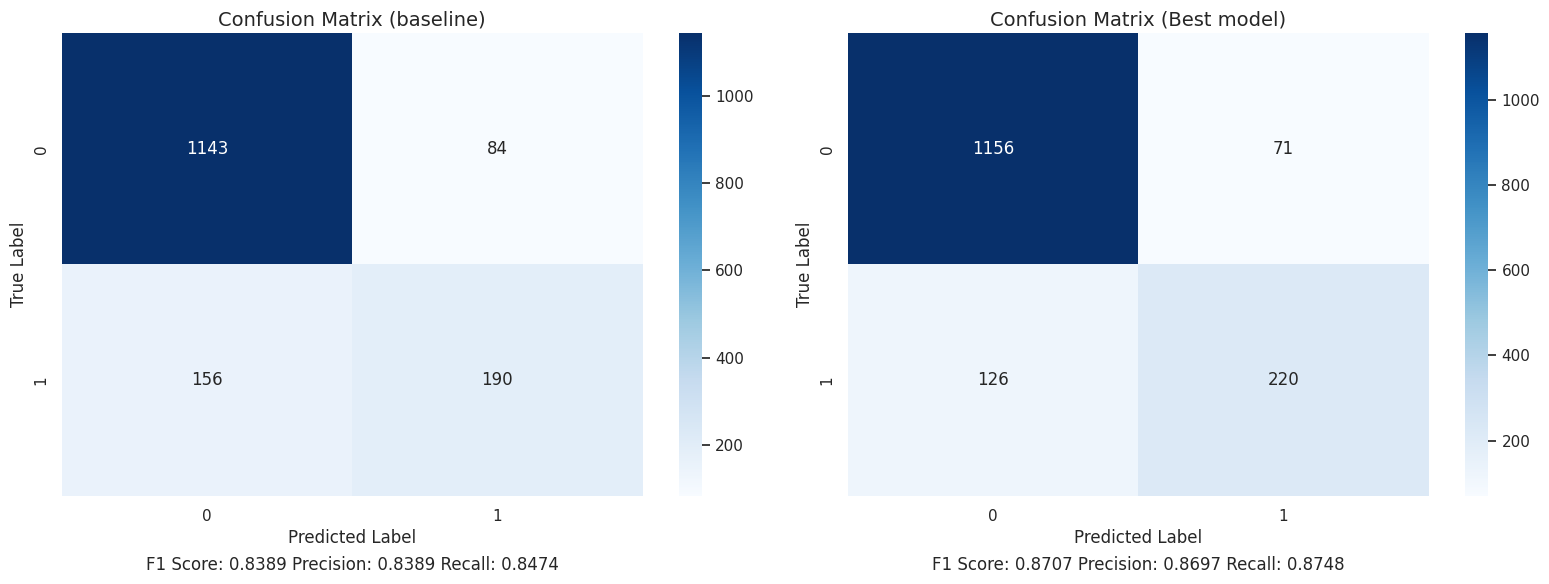

In [131]:
########################## 문제 4-1 ##########################
########################## 코드 작성 ##########################

# baseline model
cm1 = confusion_matrix(y_test, y_pred1) #baseline에 대한 confusion_matrix
f1_1 =precision_score(y_test, y_pred1, average='weighted') #f1 score
precision_1 = precision_score(y_test, y_pred1, average='weighted')  #정밀도
recall_1 =recall_score(y_test, y_pred1, average='weighted') #recall계산

# best model
cm2 =confusion_matrix(y_test, y_pred2) # best모델에 대한 confusion matrix
f1_2 =f1_score(y_test, y_pred2, average='weighted') #f1 score
precision_2 = precision_score(y_test, y_pred2, average='weighted') #정밀도
recall_2 =recall_score(y_test, y_pred2, average='weighted') #recall

# 그래프 그리기
# 1행 2열의 subplot 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 첫 번째 subplot: baseline model
sns.heatmap(cm1, annot=True, fmt="d", cmap='Blues', ax=axes[0]) #heatmap을 통해 baseline confusion matrix그리기
axes[0].set_title('Confusion Matrix (baseline)', fontsize=14)
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].text(0.5, -0.15, f'F1 Score: {f1_1:.4f} Precision: {precision_1:.4f} Recall: {recall_1:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes,
             fontsize=12)



# 두 번째 subplot : Best model
sns.heatmap(cm2, annot=True, fmt="d", cmap='Blues', ax=axes[1])#heatmap을 통해 best_model confusion matrix그리기
axes[1].set_title('Confusion Matrix (Best model)', fontsize=14)
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].text(0.5,-0.15, f'F1 Score: {f1_2:.4f} Precision: {precision_2:.4f} Recall: {recall_2:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes,
             fontsize=12)

# subplot 간 간격 조절
plt.tight_layout()
plt.show()

####################################


### 문제 4-2
baseline과 bset_model에 대한 ROC Curve와 AUROC를 구하고, 두 모델의 ROC Curve를 시각화하시오.

\

---

*조건*
1. 두 모델의 ROC Curve (line)를 비교할 수 있도록 **하나의 그래프**에 시각화해야 합니다.
2. plot의 legend 안에 각 모델의 AUROC score를 출력하시오. (예시, Best model (area = 0.833))



---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.
* 힌트) model**.predict_proba**를 사용


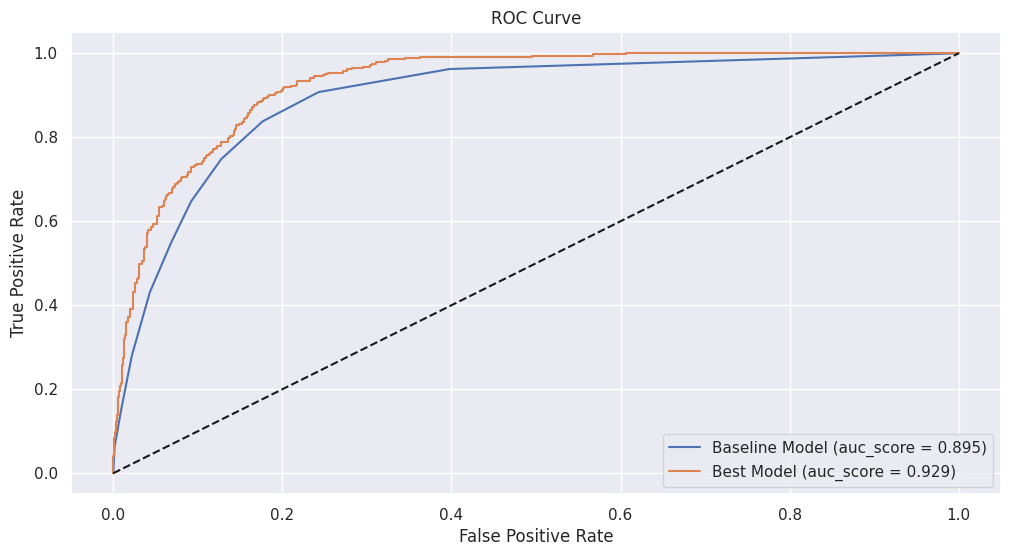

In [133]:
from sklearn.metrics import roc_curve, roc_auc_score

########################## 문제 4-2 ##########################
########################## 코드 작성 ##########################
#predict_proba를 활용하여 baseline모델에서 테스트 입력에 대해 각 클래스의 확률 추정을 예측
probs_baseline = baseline.predict_proba(X_test)[:, 1] #모든행 선택, 1에대한 추정치

#추정확률과 테스트 셋을 이용하여 roc_curve를 통해  위양성, 진양성 비율 구함
fpr_baseline, tpr_baseline, _ = roc_curve(y_test, probs_baseline)
auc_baseline = roc_auc_score(y_test, probs_baseline)  #auc 스코어 구하기

#predict_proba를 활용하여 베스트모델에서 테스트 입력에 대해 각 클래스의 확률 추정을 예측
probs_best = best_model.predict_proba(X_test)[:, 1]  #모든행 선택, 1에대한 추정치
fpr_best, tpr_best, _ = roc_curve(y_test, probs_best)
auc_best = roc_auc_score(y_test, probs_best) #auc 스코어 구하기
plt.figure(figsize=(12, 6))
#baseline과 best모델에 대해 roc_curve그리기 ,#x축을 위양성 y축을 진양성
plt.plot(fpr_baseline, tpr_baseline, label=f'Baseline Model (area = {auc_baseline:.3f})')  #baseline
plt.plot(fpr_best, tpr_best, label=f'Best Model (area = {auc_best:.3f})') #bestline

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# AUROC
############################################################